In [1]:
import pandas as pd
import numpy as np
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

pd.set_option('display.float_format','{:,.5f}'.format)
pd.set_option('display.max_columns', None)
from IPython import display

C:\Users\Irinap\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 7, 4
rcParams['axes.titlepad'] = 2

In [3]:
from utils import *

In [4]:
description = pd.read_excel('data_set.xls', sheet_name='Описание полей')

In [5]:
description

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,TARGET,целевая переменная:отклик на маркетинговую кам...
2,AGE,возраст клиента
3,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
4,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
5,GENDER,пол клиента
6,CHILD_TOTAL,количество детей клиента
7,DEPENDANTS,количество иждивенцев клиента
8,EDUCATION,образование
9,MARITAL_STATUS,семейное положение


In [6]:
df = pd.read_excel('data_set.xls', sheet_name='данные')

In [7]:
df.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,Торговля,Рабочий,Частная компания,Без участия,Вспомогательный техперсонал,от 10000 до 20000 руб.,"5,000.00000",Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,ПОВОЛЖСКИЙ,1,1,1,1,1,0,0,0,0,0,0,0,"8,000.00000",6,"8,650.00000",0,1,220,18.00000,0,0,1,1,1,6,2,1,"1,580.00000","1,580.00000",nan
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,"12,000.00000",Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,0,0,0,0,"21,650.00000",6,"4,000.00000",0,1,137,97.00000,1,0,1,1,1,6,1,1,"4,020.00000","4,020.00000",nan
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,Информационные технологии,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,"9,000.00000",Иркутская область,Иркутская область,Иркутская область,Иркутская область,ВОСТОЧНО-СИБИРСКИЙ,1,1,1,1,1,0,0,0,1,0,0,0,"33,126.00000",12,"4,000.00000",0,1,251,84.00000,0,0,1,2,1,11,0,0,0.00000,0.00000,nan
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,Образование,Руководитель среднего звена,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,"25,000.00000",Ростовская область,Ростовская область,Ростовская область,Ростовская область,ЮЖНЫЙ,0,1,0,0,1,1,0,0,0,0,0,0,"8,491.82000",6,"5,000.00000",0,0,36,168.00000,1,1,1,1,1,6,3,1,"1,589.92333","1,590.00000",nan
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,Государственная служба,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,"12,000.00000",Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,1,0,0,0,"21,990.00000",12,"4,000.00000",0,1,83,101.00000,1,0,1,2,1,16,2,1,"1,152.15000","2,230.00000",nan


In [8]:
df.sort_values('AGREEMENT_RK')

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,Торговля,Рабочий,Частная компания,Без участия,Вспомогательный техперсонал,от 10000 до 20000 руб.,"5,000.00000",Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,ПОВОЛЖСКИЙ,1,1,1,1,1,0,0,0,0,0,0,0,"8,000.00000",6,"8,650.00000",0,1,220,18.00000,0,0,1,1,1,6,2,1,"1,580.00000","1,580.00000",nan
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,"12,000.00000",Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,0,0,0,0,"21,650.00000",6,"4,000.00000",0,1,137,97.00000,1,0,1,1,1,6,1,1,"4,020.00000","4,020.00000",nan
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,Информационные технологии,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,"9,000.00000",Иркутская область,Иркутская область,Иркутская область,Иркутская область,ВОСТОЧНО-СИБИРСКИЙ,1,1,1,1,1,0,0,0,1,0,0,0,"33,126.00000",12,"4,000.00000",0,1,251,84.00000,0,0,1,2,1,11,0,0,0.00000,0.00000,nan
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,Образование,Руководитель среднего звена,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,"25,000.00000",Ростовская область,Ростовская область,Ростовская область,Ростовская область,ЮЖНЫЙ,0,1,0,0,1,1,0,0,0,0,0,0,"8,491.82000",6,"5,000.00000",0,0,36,168.00000,1,1,1,1,1,6,3,1,"1,589.92333","1,590.00000",nan
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,Государственная служба,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,"12,000.00000",Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,1,0,0,0,"21,990.00000",12,"4,000.00000",0,1,83,101.00000,1,0,1,2,1,16,2,1,"1,152.15000","2,230.00000",nan
5,59911784,0,29,1,0,0,0,0,Среднее,Гражданский брак,Торговля,Специалист,Частная компания,Без участия,Адм-хоз. и трансп. службы,от 20000 до 50000 руб.,"12,000.00000",Белгородская область,Белгородская область,Белгородская область,Белгородская область,ЦЕНТРАЛЬНЫЙ 1,1,1,1,1,1,0,1,0,0,0,0,0,"30,615.00000",12,"3,500.00000",0,0,108,40.00000,1,0,1,2,1,11,0,0,0.00000,0.00000,nan
6,59911832,0,35,1,0,0,1,1,Высшее,Разведен(а),Другие сферы,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,"15,000.00000",Вологодская область,Вологодская область,Вологодская область,Вологодская область,ЦЕНТРАЛЬНЫЙ 2,1,1,1,1,1,1,0,0,0,0,0,0,"10,450.00000",3,"15,000.00000",0,1,48,6.00000,0,0,1,2,2,14,0,0,0.00000,0.00000,nan
7,59912034,0,41,1,0,1,0,0,Среднее,Состою в браке,Сельское хозяйство,Рабочий,Частная компания,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,"6,000.00000",Волгоградская область,Волгоградская область,Волгоградская область,Волгоградская область,ЮЖНЫЙ,1,1,1,1,1,1,0,0,0,0,0,0,"15,035.00000",10,465.00000,0,1,204,6.00000,1,1,1,2,1,11,0,0,0.00000,0.00000,nan
8,59912560,0,53,1,0,0,2,0,Высшее,Состою в браке,Здравоохранение,Руководитель высшего звена,Частная компания,Без участия,Участие в основ. деятельности,свыше 50000 руб.,"100,000.00000",Яросла

In [9]:
len(set(df.AGREEMENT_RK))

15223

In [10]:
df.set_index('AGREEMENT_RK', inplace = True)

In [11]:
df.shape

(15223, 51)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15223 entries, 59910150 to 75292242
Data columns (total 51 columns):
TARGET                        15223 non-null int64
AGE                           15223 non-null int64
SOCSTATUS_WORK_FL             15223 non-null int64
SOCSTATUS_PENS_FL             15223 non-null int64
GENDER                        15223 non-null int64
CHILD_TOTAL                   15223 non-null int64
DEPENDANTS                    15223 non-null int64
EDUCATION                     15223 non-null object
MARITAL_STATUS                15223 non-null object
GEN_INDUSTRY                  13856 non-null object
GEN_TITLE                     13856 non-null object
ORG_TP_STATE                  13856 non-null object
ORG_TP_FCAPITAL               13858 non-null object
JOB_DIR                       13856 non-null object
FAMILY_INCOME                 15223 non-null object
PERSONAL_INCOME               15223 non-null float64
REG_ADDRESS_PROVINCE          15223 non-null object
FAC

In [13]:
df['TARGET'].value_counts()

0    13411
1     1812
Name: TARGET, dtype: int64

In [14]:
# Выделяем числовые и бинарные признаки

binary = [col for col in df.columns if (len(df[col].unique()) == 2) and (df[col].dtype != 'object') and (col != 'TARGET')]
linear = [col for col in df.columns if (df[col].dtype != 'object') and (col not in binary) and (col != 'TARGET')]
df_lin_bin = df[binary + linear + ['TARGET']]

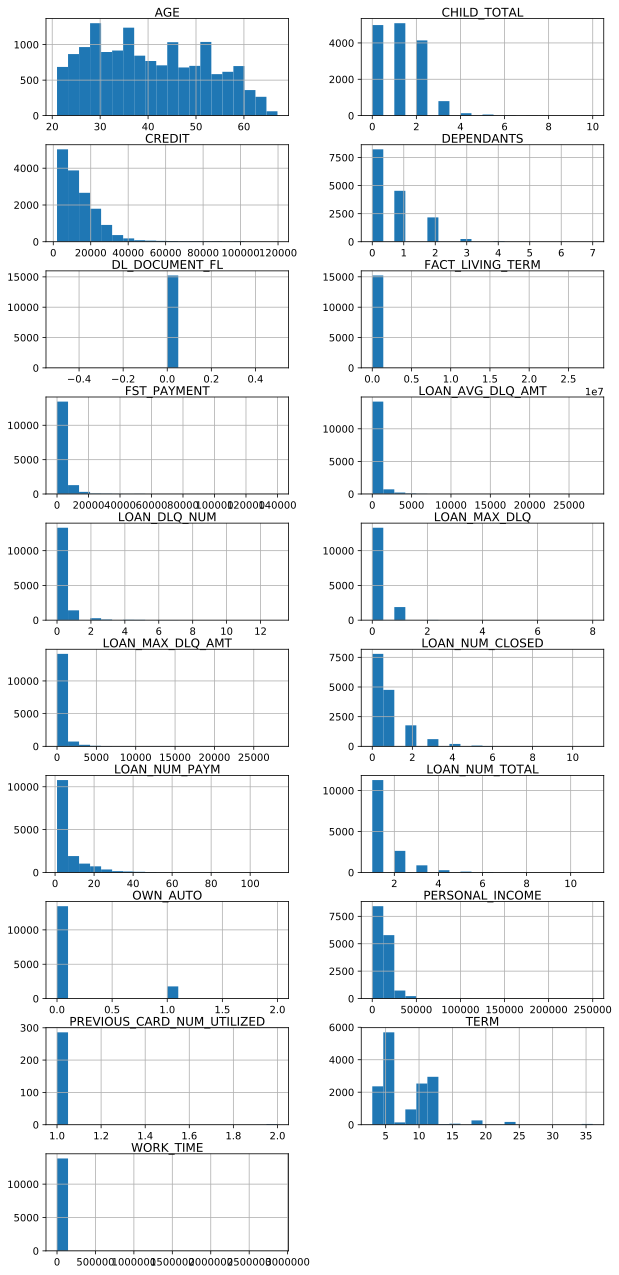

In [15]:
# Распределения признаков
df[linear].hist(figsize=(10,25), layout=(round(len(linear)/2)+1,2), xlabelsize=10, bins=20);

In [16]:
# Связь признаков и целевого оттока
#fig, axes = plt.subplots(nrows=12, ncols=2, figsize=(16, 10))

#for idx, feat in  enumerate(linear):
#    sns.boxplot(x='TARGET', y=feat, data=df_lin, ax=np.newaxis([idx/4, idx%4]))
#    axes[idx / 4, idx % 4].legend()
#    axes[idx / 4, idx % 4].set_xlabel('TARGET')
#    axes[idx / 4, idx % 4].set_ylabel(feat)

### Убираем пропуски и выбросы

In [17]:
df_lin_bin.shape

(15223, 38)

In [18]:
df_lin_bin = df_lin_bin.dropna()

In [19]:
df_lin_bin.shape

(272, 38)

In [20]:
#B_cal_0 = outliers_removed_index
outliers_removed_index = remove_outliers(df_lin_bin[linear])

In [21]:
outliers_removed = df_lin_bin.loc[outliers_removed_index]

In [22]:
outliers_removed.shape

(142, 38)

### Блок кластеризации

In [23]:
outliers_removed.head()

,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,GPF_DOCUMENT_FL,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,AGE,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,OWN_AUTO,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,TARGET
AGREEMENT_RK,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
61030687,1,0,0,1,1,1,1,1,1,0,0,0,0,0,1,1,0,1,36,0,0,"8,000.00000",0,"14,206.00000",12,"10,000.00000",0,180,36.00000,2,0,24,1,1,"1,560.00000","1,560.00000",1.00000,1
61453912,1,0,1,1,1,1,1,1,1,0,0,0,0,0,1,1,0,1,47,3,1,"22,000.00000",0,"6,889.00000",6,"2,000.00000",0,26,72.00000,2,2,16,0,0,0.00000,0.00000,1.00000,0
63757465,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,32,2,1,"5,500.00000",0,"4,490.00000",6,500.00000,0,60,4.00000,3,2,6,0,0,0.00000,0.00000,1.00000,0
63760332,1,0,1,1,1,1,1,0,0,0,1,0,0,0,1,1,0,1,35,1,1,"8,000.00000",0,"12,737.00000",10,"1,420.00000",0,126,156.00000,4,3,32,1,1,"2,610.00000","2,610.00000",1.00000,0
63804145,1,0,0,1,1,1,1,1,0,0,1,0,0,0,1,0,0,1,36,1,2,"17,000.00000",0,"9,396.00000",10,"2,155.00000",0,73,180.00000,2,2,22,0,0,0.00000,0.00000,1.00000,0


In [24]:
scaler = StandardScaler()
scaler.fit(outliers_removed[linear])
outliers_removed[linear] = scaler.transform(outliers_removed[linear])

In [25]:
outliers_removed.head()

,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,GPF_DOCUMENT_FL,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,AGE,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,OWN_AUTO,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,TARGET
AGREEMENT_RK,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
61030687,1,0,0,1,1,1,1,1,1,0,0,0,0,0,1,1,0,1,-0.32345,-1.45445,-1.16535,-0.98074,0.00000,0.14846,1.27079,3.70611,0.00000,0.81032,-0.66724,-0.72480,-2.45861,0.43492,1.30832,2.01778,2.07835,1.98209,0.00000,1
61453912,1,0,1,1,1,1,1,1,1,0,0,0,0,0,1,1,0,1,1.03105,2.10645,0.19104,1.39465,0.00000,-0.72230,-0.66262,-0.07623,0.00000,-1.09199,-0.07393,-0.72480,-0.05914,-0.36197,-0.46103,-0.49559,-0.45654,-0.45420,0.00000,0
63757465,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,-0.81599,0.91948,0.19104,-1.40492,0.00000,-1.00780,-0.66262,-0.78542,0.00000,-0.67200,-1.19463,0.70467,-0.05914,-1.35808,-0.46103,-0.49559,-0.45654,-0.45420,0.00000,0
63760332,1,0,1,1,1,1,1,0,0,0,1,0,0,0,1,1,0,1,-0.44658,-0.26749,0.19104,-0.98074,0.00000,-0.02636,0.62632,-0.35045,0.00000,0.14327,1.31046,2.13413,1.14059,1.23182,1.30832,2.01778,3.78453,3.62191,0.00000,0
63804145,1,0,0,1,1,1,1,1,0,0,1,0,0,0,1,0,0,1,-0.32345,-0.26749,1.54743,0.54629,0.00000,-0.42396,0.62632,-0.00295,0.00000,-0.51142,1.70600,-0.72480,-0.05914,0.23570,-0.46103,-0.49559,-0.45654,-0.45420,0.00000,0


In [26]:
# Выбор A_cal_0
roc_auc, A_cal_0 = top_15_features(outliers_removed)

In [27]:
A_cal_0

['LAND_PRESENCE_FL',
 'DEPENDANTS',
 'FACT_PHONE_FL',
 'SOCSTATUS_PENS_FL',
 'CREDIT',
 'FL_PRESENCE_FL',
 'REG_FACT_POST_TP_FL',
 'HS_PRESENCE_FL',
 'LOAN_NUM_CLOSED',
 'GPF_DOCUMENT_FL',
 'REG_PHONE_FL',
 'LOAN_NUM_TOTAL',
 'PERSONAL_INCOME',
 'FST_PAYMENT']

In [28]:
def make_metric_features(n_clusters, cluster_features, df):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df[cluster_features])
    #labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    metric_features = pairwise_distances(df[cluster_features], kmeans.cluster_centers_)
    return cluster_centers, metric_features

In [29]:
cluster_centers, metric_features = make_metric_features(5, A_cal_0, outliers_removed)

## Категориальные признаки

In [307]:
categories = [col for col in df.columns if df[col].dtype == 'object']

In [308]:
categories

['EDUCATION',
 'MARITAL_STATUS',
 'GEN_INDUSTRY',
 'GEN_TITLE',
 'ORG_TP_STATE',
 'ORG_TP_FCAPITAL',
 'JOB_DIR',
 'FAMILY_INCOME',
 'REG_ADDRESS_PROVINCE',
 'FACT_ADDRESS_PROVINCE',
 'POSTAL_ADDRESS_PROVINCE',
 'TP_PROVINCE',
 'REGION_NM']

In [309]:
df[categories] = df[categories].fillna('Unknown')

In [310]:
label_enc_cols = [col for col in categories if len(df[col].unique()) >= 10]
ohe_enc_cols = [col for col in categories if len(df[col].unique()) <= 10]

In [311]:
df[categories].head()

,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM
0,Среднее специальное,Состою в браке,Торговля,Рабочий,Частная компания,Без участия,Вспомогательный техперсонал,от 10000 до 20000 руб.,Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,ПОВОЛЖСКИЙ
1,Среднее,Состою в браке,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ
2,Неполное среднее,Состою в браке,Информационные технологии,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,Иркутская область,Иркутская область,Иркутская область,Иркутская область,ВОСТОЧНО-СИБИРСКИЙ
3,Высшее,Состою в браке,Образование,Руководитель среднего звена,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,Ростовская область,Ростовская область,Ростовская область,Ростовская область,ЮЖНЫЙ
4,Среднее,Состою в браке,Государственная служба,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ


In [312]:
d = {}
for col in label_enc_cols: #+ ohe_enc_cols:
    transformer = LabelEncoder()
    transformer.fit(df[col])
    d[col] = transformer
    
    df[col] = transformer.transform(df[col])

In [313]:
df[label_enc_cols].head()

,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM
0,24,7,3,46,46,45,41,4
1,24,7,9,19,19,18,55,11
2,5,12,9,18,18,17,17,1
3,14,10,9,52,52,51,47,11
4,2,12,9,19,19,18,55,11


In [314]:
# ohe = OneHotEncoder()

# ohe.fit(df[ohe_enc_cols])

# pd.concat([df, pd.DataFrame(ohe.transform(df[ohe_enc_cols]).todense())], axis=1)

# ohe.transform(df[ohe_enc_cols])

In [315]:
# Когда придут новые данные, если сделать тот же гет дамис, может быть больше (или меньше) колонок, чем на трейне
df = pd.get_dummies(df, columns=ohe_enc_cols, dummy_na=True, sparse=False)

In [316]:
df.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,EDUCATION_Высшее,EDUCATION_Два и более высших образования,EDUCATION_Неоконченное высшее,EDUCATION_Неполное среднее,EDUCATION_Среднее,EDUCATION_Среднее специальное,EDUCATION_Ученая степень,EDUCATION_nan,MARITAL_STATUS_Вдовец/Вдова,MARITAL_STATUS_Гражданский брак,MARITAL_STATUS_Не состоял в браке,MARITAL_STATUS_Разведен(а),MARITAL_STATUS_Состою в браке,MARITAL_STATUS_nan,ORG_TP_STATE_Unknown,ORG_TP_STATE_Государственная комп./учреж.,ORG_TP_STATE_Индивидуальный предприниматель,ORG_TP_STATE_Некоммерческая организация,ORG_TP_STATE_Частная ком. с инос. капиталом,ORG_TP_STATE_Частная компания,ORG_TP_STATE_nan,ORG_TP_FCAPITAL_Unknown,ORG_TP_FCAPITAL_Без участия,ORG_TP_FCAPITAL_С участием,ORG_TP_FCAPITAL_nan,FAMILY_INCOME_до 5000 руб.,FAMILY_INCOME_от 10000 до 20000 руб.,FAMILY_INCOME_от 20000 до 50000 руб.,FAMILY_INCOME_от 5000 до 10000 руб.,FAMILY_INCOME_свыше 50000 руб.,FAMILY_INCOME_nan
0,0.74081,1,0,1,0.90479,0.43681,24,7,3,-0.98210,46,46,45,41,4,1,1,1,1,1,0,-0.36261,0,0,0,0,0,-0.54892,-0.51320,1.01813,0.00000,1,-0.01074,-0.01067,0,0,1,-0.48866,0.25101,-0.23581,2.63451,2.44539,1.61965,1.59912,-0.13839,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
1,-0.72462,1,0,1,1.90944,2.89919,24,7,9,-0.20564,19,19,18,55,11,1,1,1,1,0,0,-0.36261,0,0,0,0,0,0.57477,-0.51320,0.11660,0.00000,1,-0.01106,-0.00727,1,0,1,-0.48866,0.25101,-0.23581,1.17466,2.44539,4.56768,4.51752,-0.13839,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0.99942,1,0,1,2.91408,-0.79437,5,12,9,-0.53841,18,18,17,17,1,1,1,1,1,1,0,-0.36261,0,1,0,0,0,1.51950,0.95237,0.11660,0.00000,1,-0.01062,-0.00783,0,0,1,0.77152,0.25101,0.39269,-0.28520,-0.36604,-0.28931,-0.29067,-0.13839,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,-0.12121,1,0,1,-0.09985,0.43681,14,10,9,1.23638,52,52,51,47,11,0,1,0,0,1,1,-0.36261,0,0,0,0,0,-0.50843,-0.51320,0.31048,0.00000,0,-0.01144,-0.00421,1,1,1,-0.48866,0.25101,-0.23581,4.09437,2.44539,1.63164,1.61108,-0.13839,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,-0.89702,1,0,0,-1.10449,-0.79437,2,12,9,-0.20564,19,19,18,55,11,1,1,1,1,0,0,-0.36261,0,1,0,0,0,0.60276,0.95237,0.11660,0.00000,1,-0.01126,-0.00710,1,0,1,0.77152,0.25101,1.02119,2.63451,2.44539,1.10272,2.37656,-0.13839,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [317]:
df.shape

(15223, 76)

## Метрические признаки

In [345]:
def make_metric_features(n_clusters, cluster_features, df):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df[cluster_features])
    #labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    metric_features = pairwise_distances(df[cluster_features], kmeans.cluster_centers_)
    return cluster_centers, metric_features

In [346]:
# Задаем признаки, на которых будут построены кластеры
# и кол-во кластеров
cluster_features = ['AGE', 'GENDER', 'PERSONAL_INCOME', 'TERM']
n_clusters = 5

In [347]:
metric_features = make_metric_features(n_clusters, cluster_features, df)[1]

In [348]:
metric_features.shape

(15223, 5)

In [322]:
cluster_features

['AGE', 'GENDER', 'PERSONAL_INCOME', 'TERM']

In [323]:
df = pd.concat([df, pd.DataFrame(metric_features, columns=["cluster_" + str(x) for x in range(1,n_clusters+1)])], axis=1)

## Разделение на train и test

In [324]:
df.shape

(15223, 81)

In [325]:
df.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,EDUCATION_Высшее,EDUCATION_Два и более высших образования,EDUCATION_Неоконченное высшее,EDUCATION_Неполное среднее,EDUCATION_Среднее,EDUCATION_Среднее специальное,EDUCATION_Ученая степень,EDUCATION_nan,MARITAL_STATUS_Вдовец/Вдова,MARITAL_STATUS_Гражданский брак,MARITAL_STATUS_Не состоял в браке,MARITAL_STATUS_Разведен(а),MARITAL_STATUS_Состою в браке,MARITAL_STATUS_nan,ORG_TP_STATE_Unknown,ORG_TP_STATE_Государственная комп./учреж.,ORG_TP_STATE_Индивидуальный предприниматель,ORG_TP_STATE_Некоммерческая организация,ORG_TP_STATE_Частная ком. с инос. капиталом,ORG_TP_STATE_Частная компания,ORG_TP_STATE_nan,ORG_TP_FCAPITAL_Unknown,ORG_TP_FCAPITAL_Без участия,ORG_TP_FCAPITAL_С участием,ORG_TP_FCAPITAL_nan,FAMILY_INCOME_до 5000 руб.,FAMILY_INCOME_от 10000 до 20000 руб.,FAMILY_INCOME_от 20000 до 50000 руб.,FAMILY_INCOME_от 5000 до 10000 руб.,FAMILY_INCOME_свыше 50000 руб.,FAMILY_INCOME_nan,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
0,0.74081,1,0,1,0.90479,0.43681,24,7,3,-0.98210,46,46,45,41,4,1,1,1,1,1,0,-0.36261,0,0,0,0,0,-0.54892,-0.51320,1.01813,0.00000,1,-0.01074,-0.01067,0,0,1,-0.48866,0.25101,-0.23581,2.63451,2.44539,1.61965,1.59912,-0.13839,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1.44096,3.28498,0.77974,1.88487,4.17682
1,-0.72462,1,0,1,1.90944,2.89919,24,7,9,-0.20564,19,19,18,55,11,1,1,1,1,0,0,-0.36261,0,0,0,0,0,0.57477,-0.51320,0.11660,0.00000,1,-0.01106,-0.00727,1,0,1,-0.48866,0.25101,-0.23581,1.17466,2.44539,4.56768,4.51752,-0.13839,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1.94295,2.44061,1.68298,0.53102,3.99352
2,0.99942,1,0,1,2.91408,-0.79437,5,12,9,-0.53841,18,18,17,17,1,1,1,1,1,1,0,-0.36261,0,1,0,0,0,1.51950,0.95237,0.11660,0.00000,1,-0.01062,-0.00783,0,0,1,0.77152,0.25101,0.39269,-0.28520,-0.36604,-0.28931,-0.29067,-0.13839,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.48754,3.14977,1.71360,2.26470,2.78173
3,-0.12121,1,0,1,-0.09985,0.43681,14,10,9,1.23638,52,52,51,47,11,0,1,0,0,1,1,-0.36261,0,0,0,0,0,-0.50843,-0.51320,0.31048,0.00000,0,-0.01144,-0.00421,1,1,1,-0.48866,0.25101,-0.23581,4.09437,2.44539,1.63164,1.61108,-0.13839,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,2.16476,1.11668,1.88550,1.68139,4.01987
4,-0.89702,1,0,0,-1.10449,-0.79437,2,12,9,-0.20564,19,19,18,55,11,1,1,1,1,0,0,-0.36261,0,1,0,0,0,0.60276,0.95237,0.11660,0.00000,1,-0.01126,-0.00710,1,0,1,0.77152,0.25101,1.02119,2.63451,2.44539,1.10272,2.37656,-0.13839,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1.82462,2.63614,2.58727,1.29440,2.70101


In [326]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=42)

In [327]:
y_test.value_counts(normalize=True)

0   0.87966
1   0.12034
Name: TARGET, dtype: float64

In [328]:
y_train.value_counts(normalize=True)

0   0.88140
1   0.11860
Name: TARGET, dtype: float64

In [329]:
X_train.shape, X_test.shape

((11417, 81), (3806, 81))

## Логистическая регрессия с использованием метрических признаков

In [330]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [331]:
y_scores = clf.predict_proba(X_test)[:, 1]

In [332]:
print("AUC-ROC", roc_auc_score(y_test, y_scores))
print("Gini", 2*roc_auc_score(y_test, y_scores) - 1)

AUC-ROC 0.6912599844526877
Gini 0.3825199689053753


In [333]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores, pos_label=None)

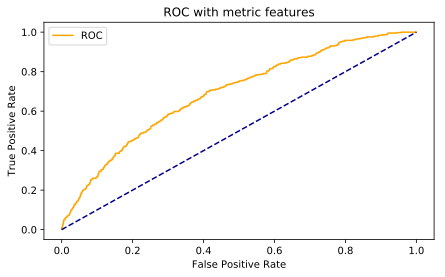

In [335]:
plot_roc_cur(fpr, tpr, title='ROC with metric features')

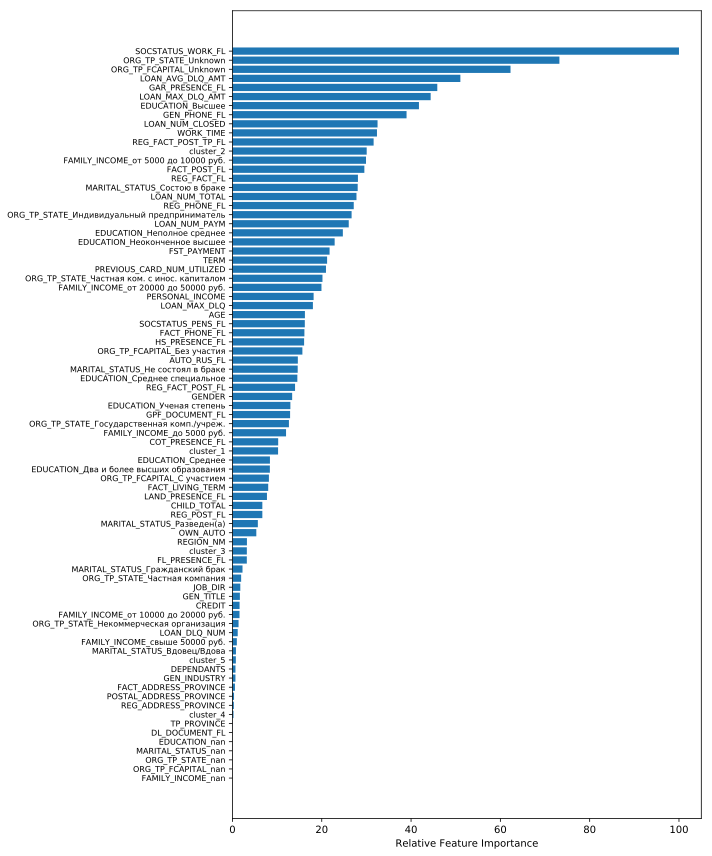

In [337]:
feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10, 12))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_test.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   

## Подбор оптимального кол-ва кластеров

In [454]:
without_metric_feats = [col for col in df.columns if col not in ["cluster_"+str(x) for x in range(1,n_clusters+1)]]

In [455]:
df = df[without_metric_feats]

In [456]:
df.shape

(15223, 76)

In [457]:
cluster_features = ['AGE', 'GENDER', 'PERSONAL_INCOME', 'TERM']

In [458]:
roc_auc_scores = []
for n_clusters in range(1,21):
    metric_features = make_metric_features(n_clusters, cluster_features, df)[1]
    df_new = pd.concat([df, pd.DataFrame(metric_features, columns=["cluster_" + str(x) for x in range(1,n_clusters+1)])], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.25, random_state=42)
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    y_scores = clf.predict_proba(X_test)[:, 1]
    roc_auc_scores.append(roc_auc_score(y_test, y_scores))

In [459]:
roc_auc_scores

[0.691376719725783,
 0.6917217083261598,
 0.6917093174312501,
 0.6902634956410136,
 0.6912599844526877,
 0.6886096372467693,
 0.6887844140802304,
 0.6885607258194946,
 0.688282908912575,
 0.6875277164754556,
 0.6870855571728934,
 0.6873203320238113,
 0.6874266328590881,
 0.6863055829459548,
 0.6870138204128906,
 0.6874507624965437,
 0.687030776374346,
 0.6857369060848424,
 0.6868364349699749,
 0.6868677382834307]

Text(0.5,1,'Зависимость ROC от количества кластеров')

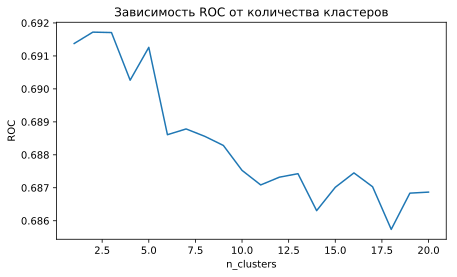

In [460]:
plt.plot([n for n in range(1,len(roc_auc_scores)+1)], roc_auc_scores, label='ROC')
plt.xlabel('n_clusters')
plt.ylabel('ROC')
plt.title('Зависимость ROC от количества кластеров')

## Обучение модели с использованием ОПТИМАЛЬНОГО количества кластеров для построения метрических признаков

In [419]:
df = df[without_metric_feats]

In [420]:
if df.shape == (15223, 76):
    print('Датфрейм не содержит метрические признаки')
else:
    print('Датфрейм содержит метрические признаки')    

Датфрейм не содержит метрические признаки


In [421]:
n_clusters = roc_auc_scores.index(max(roc_auc_scores))+1

In [422]:
n_clusters

2

In [423]:
cluster_centers, metric_features = make_metric_features(n_clusters, cluster_features, df)

In [424]:
df = pd.concat([df, pd.DataFrame(metric_features, columns=["cluster_" + str(x) for x in range(1,n_clusters+1)])], axis=1)

In [425]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=42)

In [426]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [427]:
y_scores = clf.predict_proba(X_test)[:, 1]

In [434]:
cluster_features, cluster_centers

(['AGE', 'GENDER', 'PERSONAL_INCOME', 'TERM'],
 array([[-0.74710446,  0.57478109,  0.1767357 , -0.03311971],
        [ 0.96109187,  0.75713427, -0.22735675,  0.04260593]]))

In [435]:
print("AUC-ROC", roc_auc_score(y_test, y_scores))
print("Gini", 2*roc_auc_score(y_test, y_scores) - 1)

AUC-ROC 0.6917217083261598
Gini 0.3834434166523195


In [436]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores, pos_label=None)

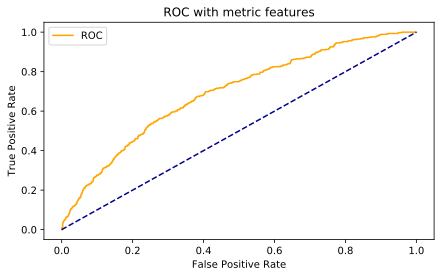

In [437]:
plot_roc_cur(fpr, tpr, title='ROC with metric features')

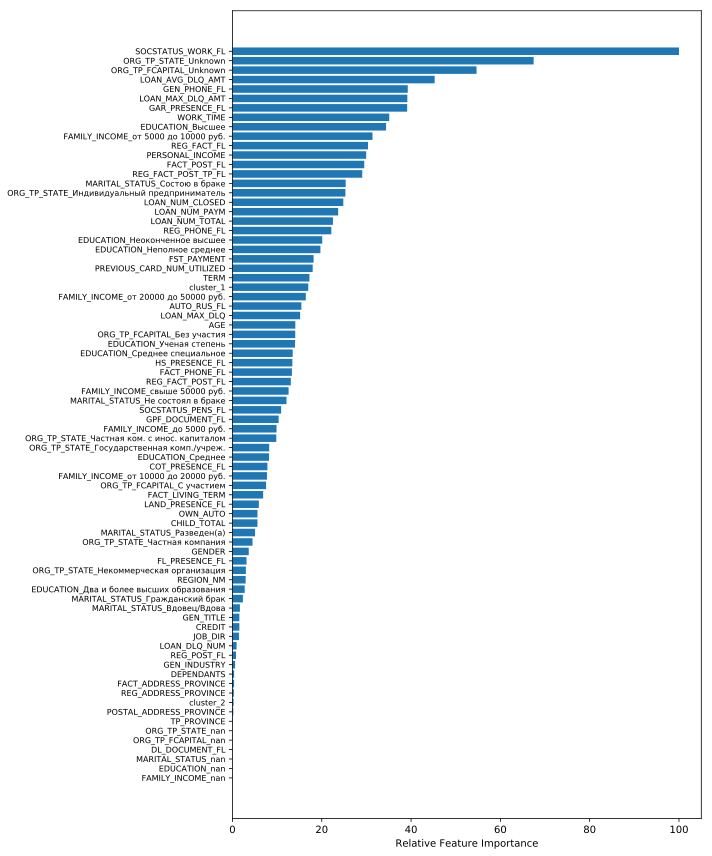

In [438]:
feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10, 12))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_test.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()  

## Логистическая регрессия без метрических признаков

In [439]:
without_metric_feats = [col for col in df.columns if col not in ["cluster_"+str(x) for x in range(1,n_clusters+1)]]

In [440]:
len(without_metric_feats)

76

In [441]:
clf_without_mf = LogisticRegression(random_state=0).fit(X_train[without_metric_feats], y_train)

In [442]:
y_scores = clf_without_mf.predict_proba(X_test[without_metric_feats])[:, 1]

In [443]:
print("AUC-ROC", roc_auc_score(y_test, y_scores))
print("Gini", 2*roc_auc_score(y_test, y_scores) - 1)

AUC-ROC 0.689521998403531
Gini 0.379043996807062


In [444]:
fpr2, tpr2, thresholds = metrics.roc_curve(y_test, y_scores, pos_label=None)

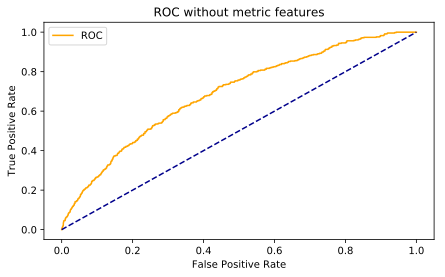

In [445]:
plot_roc_cur(fpr2, tpr2, title='ROC without metric features')